In [1]:
# Libraries to be used 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

C:\Users\jokin.ormazabal\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Import the file into a dataframe 

try:
    aps_failure_set=pd.read_csv(r"\\sedna\jokin.ormazabal$\$Profile\Desktop\Master\Data Prep\aps_failure_set.csv")
    print("APS Failure Set successfully imported into a dataframe")
except:
    print("Something went wrong importing the APS Failure Set")

#As comma is the defaulted delimiter, we dont need to specify it

#try to do it trough a url



APS Failure Set successfully imported into a dataframe


####### Based on the explanation received, we know the data divides between the errors relating APS and not, 
######so we divide the main df into 2 different ones.

In [4]:
aps_failures=aps_failure_set.loc[aps_failure_set['class']=='pos']
not_aps_failures=aps_failure_set.loc[aps_failure_set['class']=='neg']

###### EXPLANATORY DATA ANALYSIS FOR APS RELATED FAILURES

In [6]:
 # Check for null and missing values

na_values_aps_failures = aps_failures.isna().sum()
na_aps = na_values_aps_failures.to_numpy()

if np.sum(na_aps) == 0:
    print('The APS failures dataset has NO na values')
else:
    print('The APS failures dataset has na values')



The APS failures dataset has NO na values


####### We know by looking at the data that it actually has na values but the function is not catching them. 
####### This happens because the na is a string and for python the value is actually not null. 
####### It is important to always manually review the data and check that the output from the code make sense.

In [8]:
# We will now look for values equal to 'na'

na_values_aps_failures=aps_failures.isin(['na']) #creates a df with True for values=='na' & false for values !='na'

if (na_values_aps_failures.any().any())==True: 
    print('The APS failures dataset has values equal to na')
else:
     print('The APS failures dataset has NO values equal to na')

The APS failures dataset has values equal to na


####### As we suspected, we actually have null values. 
####### These values will need to be excluded from any statistical analysis and python has ways to do so. 
####### The best method will be to convert those na values into propper NaN's so that the code recognises them latter.

In [10]:
aps_failures=aps_failures.replace("na",np.nan) 
aps_failures=aps_failures.replace("",np.nan) # In case there are any blank values, we convert them as NaN as well

na_aps = na_values_aps_failures.to_numpy()

if np.sum(na_aps) == 0:
    print('The APS failures dataset has NO na values')
else:
    print('The APS failures dataset has na values')



The APS failures dataset has na values


In [11]:
# Now that we identified the existance of NaN values we will contextualize them and decide if we can drop them. 

In [12]:
aps_failures.shape 

(1000, 171)

In [13]:
# We know that we have 1000 rows and 171 columns. So now It will interesting to see which columns have a great % of nulls 

In [14]:
null_percentages=(aps_failures.isnull().sum()/1000*100)
null_percentages = aps_failures.isnull().mean() * 100 # we can also do it with the mean attribute

In [15]:
High_null_aps_failures = pd.DataFrame(null_percentages, columns=['High_Null']) #Data frame with the % of null values by column
print (High_null_aps_failures)

        High_Null
class         0.0
aa_000        0.0
ab_000       77.1
ac_000       46.2
ad_000       64.5
...           ...
ee_007        0.5
ee_008        0.5
ee_009        0.5
ef_000       37.7
eg_000       37.7

[171 rows x 1 columns]


In [16]:
High_null_aps_failures.reset_index(drop=False, inplace=True) #I need to add an index as the sensor names where not counting as a propper column

In [17]:
# print (High_null_aps_failures)

In [18]:
High_null_aps_failures=High_null_aps_failures[High_null_aps_failures.iloc[:,1]>20] #Select the sensors with greater than 20% null values

High_null_aps_failures.shape

(60, 2)

In [19]:
# We see that there are 60 sensors with more than 20% of null values. I consider that number too high to analyse them

# I'll drop all those columns to focus only on the most reliable data.

In [20]:
faulty_sensors=High_null_aps_failures.iloc[:,0].tolist() #get the name of the faulty sensors on a list 

In [21]:
aps_failures=aps_failures.drop(faulty_sensors,axis=1)
aps_failures.shape

(1000, 111)

In [22]:
# We droped what I considered faulty sensors by the high null values, but still we have nulls on the other sensors.
# The existance of this nulls makes the sample incosistant as we have more records for some sensors. 
# We will drop the rows with null values to make the data set equal for every sensor type.


In [23]:
aps_failures = aps_failures.dropna()
aps_failures.shape

(861, 111)

In [24]:
#We have cleaned our dataset from nulls and "faulty" data, but still we have a high number of different sensors to analyse

#To make a more in depth analysis, I will select the top 5 sensors that their failures are related to an APS failure.

In [25]:
aps_failures.set_index(aps_failures.columns[0],inplace=True) # To calculate the mode I need to exclude the first column, so I'll make it the index

aps_failures=aps_failures.astype(float) # Convert all the df to float type. It got converted to int with so many cleaning

In [ ]:
# As each number represents the Component Sensor result we cant group the data with the mean. 

###### I'll use the mode to detect the most repeated error type by sensor


In [71]:
df_melted = aps_failures.melt(var_name='Sensor', value_name='Mode') # Group the number of errors by Sensor type

In [72]:
#Failures_mode=aps_failures.mode()
print (df_melted)

       Sensor       Mode
0      aa_000   453236.0
1      aa_000  1056758.0
2      aa_000   361638.0
3      aa_000   791254.0
4      aa_000  1053152.0
...       ...        ...
94705  ee_009    10790.0
94706  ee_009     2458.0
94707  ee_009        0.0
94708  ee_009        0.0
94709  ee_009        0.0

[94710 rows x 2 columns]


In [78]:
# Get the mode of each column
modes = aps_failures.mode().iloc[0]

# Convert to DataFrame and reset index
df_modes = pd.DataFrame(modes).reset_index()

# Rename the columns
df_modes.columns = ['Sensor', 'Mode']

df_modes

,Sensor,Mode
0,aa_000,181460.0
1,ag_000,0.0
2,ag_001,0.0
3,ag_002,0.0
4,ag_003,0.0
...,...,...
105,ee_005,0.0
106,ee_006,0.0
107,ee_007,0.0
108,ee_008,0.0


In [83]:
df_modes=df_modes[df_modes['Mode'] != 0]

print (df_modes)

    Sensor         Mode
0   aa_000    181460.00
11  ah_000  14818484.00
16  an_000  16230962.00
17  ao_000  13692914.00
18  ap_000   6904476.00
19  aq_000   3618134.00
53  bb_000  24654966.00
54  bg_000  14818484.00
55  bh_000    363444.00
56  bi_000   1550620.00
57  bj_000   5339498.00
58  bk_000    387860.00
59  bl_000    393520.00
60  bm_000    424600.00
61  bn_000    438120.00
62  bo_000   1310700.00
63  bp_000   1310700.00
64  bq_000   1310700.00
65  br_000   1310700.00
66  bs_000     22880.00
67  bt_000    181459.46
68  bu_000  24654966.00
69  bv_000  24654966.00
70  bx_000       226.00
72  cb_000     42860.00
74  cd_000   1209600.00
75  ci_000  14244931.20
77  ck_000  10022479.68
88  cq_000  24654966.00
99  dn_000    242252.00


bb_000    5.313761e+07
bv_000    5.313761e+07
cq_000    5.313761e+07
bu_000    5.313761e+07
bx_000    4.548410e+07
cc_000    4.274224e+07
ci_000    4.026532e+07
an_000    3.721372e+07
ao_000    3.218488e+07
az_005    2.435005e+07
cs_005    2.206840e+07
ah_000    1.992681e+07
bg_000    1.992681e+07
ba_000    1.438220e+07
ap_000    1.418936e+07
cn_004    1.394432e+07
ay_008    1.384981e+07
ay_007    1.372521e+07
az_004    1.336726e+07
ag_006    1.331767e+07
Name: Mode, dtype: float64


Sensor        dn_000
Mode      24654966.0
dtype: object
Sensor    aa_000
Mode       226.0
dtype: object


Text(0.5, 0, 'Sensor type')

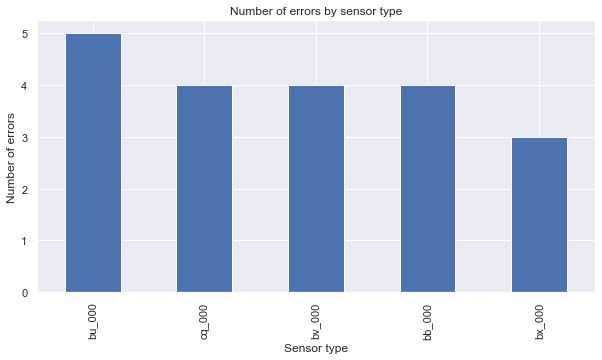

In [82]:
df_top_20.Sensor.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of errors by sensor type")
plt.ylabel("Number of errors")
plt.xlabel("Sensor type")



192871534.0
152457314.0


       Sensor  Number of Errors
75926  cq_000       192871534.0
59567  bv_000       192871534.0
58706  bu_000       192871534.0
45791  bb_000       192871534.0
59086  bu_000       174389278.0
76306  cq_000       174389278.0
46171  bb_000       174389278.0
59947  bv_000       174389278.0
61001  bx_000       162793482.0
60322  bx_000       157403558.0
58970  bu_000       156119556.0
59831  bv_000       156119556.0
46055  bb_000       156119556.0
76190  cq_000       156119556.0
60972  bx_000       154113680.0
59250  bu_000       154053392.0
46335  bb_000       154053392.0
76470  cq_000       154053392.0
60111  bv_000       154053392.0
59042  bu_000       152457314.0


Text(0.5, 0, 'Sensor type')

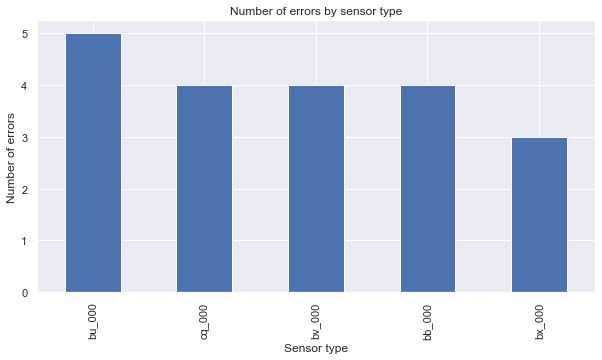